## 외국 경고문 인식

### 목적

외국에서 운전하거나 걸어가던 중 있던 경고문을 제대로 알지 못해 생기는 불편한 상황을 없애기 위해 OCR로 문자 인식하여 사전 예방하기

### 평가기준

- 이미지에 있는 문자를 제대로 인식하는지 여부에 따라 평가함
- 멀리서도 제대로 인식하기 위해 작은 글자도 제대로 인식하는지 여부에 따라 평가함

## 데이터 불러오기

In [1]:
import keras_ocr
import pytesseract
import os
import matplotlib.pyplot as plt
import keras_ocr
print(keras_ocr.__version__)
print(pytesseract.__version__)
# pytesseract는 tesseract-ocr에 종속적입니다. 아래 명령어를 통해 설치해야 할 수도 있습니다.
# !sudo apt install tesseract-ocr

0.8.8
0.3.8


In [2]:
image_dir = [
    os.getenv('HOME')+'/aiffel/ocr_python/data/warning1.png',
    os.getenv('HOME')+'/aiffel/ocr_python/data/warning2.png',
    os.getenv('HOME')+'/aiffel/ocr_python/data/warning3.png',
    os.getenv('HOME')+'/aiffel/ocr_python/data/warning4.png',
    os.getenv('HOME')+'/aiffel/ocr_python/data/warning5.png',
    os.getenv('HOME')+'/aiffel/ocr_python/data/warning6.png',
    os.getenv('HOME')+'/aiffel/ocr_python/data/warning7.png',
    os.getenv('HOME')+'/aiffel/ocr_python/data/warning8.png',
    os.getenv('HOME')+'/aiffel/ocr_python/data/warning9.png',
    os.getenv('HOME')+'/aiffel/ocr_python/data/warning10.png',
    os.getenv('HOME')+'/aiffel/ocr_python/data/warning11.png',
    os.getenv('HOME')+'/aiffel/ocr_python/data/warning12.png',
    os.getenv('HOME')+'/aiffel/ocr_python/data/warning13.png',
    os.getenv('HOME')+'/aiffel/ocr_python/data/warning14.png',
    os.getenv('HOME')+'/aiffel/ocr_python/data/warning15.png',
    os.getenv('HOME')+'/aiffel/ocr_python/data/warning16.png',
    os.getenv('HOME')+'/aiffel/ocr_python/data/warning17.png',
    os.getenv('HOME')+'/aiffel/ocr_python/data/warning18.png',
    os.getenv('HOME')+'/aiffel/ocr_python/data/warning19.png',
    os.getenv('HOME')+'/aiffel/ocr_python/data/warning20.png',

]

### Keras-OCR 사용하여 문자 인식하기

In [3]:
# keras-ocr이 detector과 recognizer를 위한 모델을 자동으로 다운로드받게 됩니다. 
pipeline = keras_ocr.pipeline.Pipeline()
images = [ keras_ocr.tools.read(i_dir) for i_dir in image_dir]
prediction_groups = [pipeline.recognize([i_dir]) for i_dir in image_dir]

Looking for /aiffel/.keras-ocr/craft_mlt_25k.h5
Looking for /aiffel/.keras-ocr/crnn_kurapan.h5


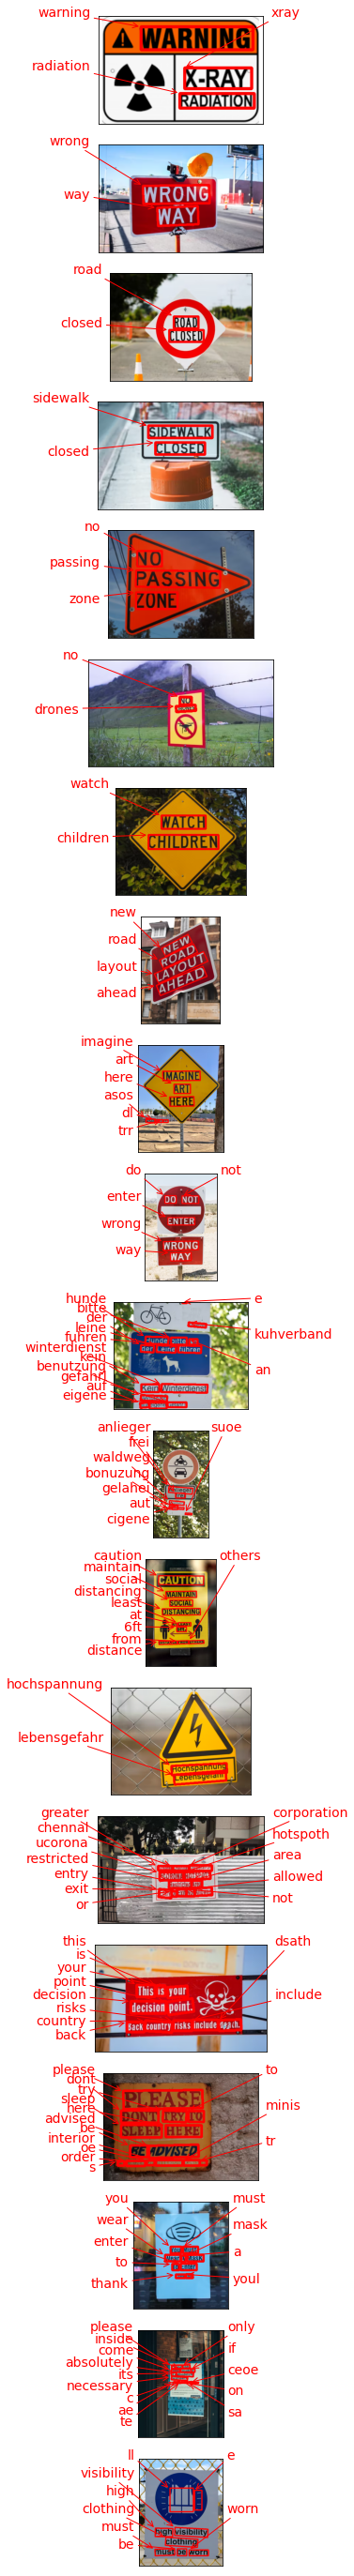

In [50]:
# Plot the predictions
fig, axs = plt.subplots(nrows=len(images), figsize=(50, 50))
for idx, ax in enumerate(axs):
    keras_ocr.tools.drawAnnotations(image=images[idx], 
                                    predictions=prediction_groups[idx][0], ax=ax)

### Tesseract 사용

In [63]:
import os
import pytesseract
from PIL import Image

from pytesseract import Output
import matplotlib.pyplot as plt

# OCR Engine modes(–oem):
# 0 - Legacy engine only.
# 1 - Neural nets LSTM engine only.
# 2 - Legacy + LSTM engines.
# 3 - Default, based on what is available.

# Page segmentation modes(–psm):
# 0 - Orientation and script detection (OSD) only.
# 1 - Automatic page segmentation with OSD.
# 2 - Automatic page segmentation, but no OSD, or OCR.
# 3 - Fully automatic page segmentation, but no OSD. (Default)
# 4 - Assume a single column of text of variable sizes.
# 5 - Assume a single uniform block of vertically aligned text.
# 6 - Assume a single uniform block of text.
# 7 - Treat the image as a single text line.
# 8 - Treat the image as a single word.
# 9 - Treat the image as a single word in a circle.
# 10 - Treat the image as a single character.
# 11 - Sparse text. Find as much text as possible in no particular order.
# 12 - Sparse text with OSD.
# 13 - Raw line. Treat the image as a single text line, bypassing hacks that are Tesseract-specific.

def crop_word_regions(title,image_path='./images/sample.png', output_path='./output'):
    if not os.path.exists(output_path):
        os.mkdir(output_path)
    custom_oem_psm_config = r'--oem 3 --psm 3'
    
    image = Image.open(image_path)
    print(image.size)
    recognized_data = pytesseract.image_to_data(
        image, lang='eng',    # 한국어라면 lang='kor'
        config=custom_oem_psm_config,
        output_type=Output.DICT
    )

    top_level = max(recognized_data['level'])
    
    index = 0
    cropped_image_path_list = []
    for i in range(len(recognized_data['level'])):
        level = recognized_data['level'][i]

        if level == top_level:
            left = recognized_data['left'][i]
            top = recognized_data['top'][i]
            width = recognized_data['width'][i]
            height = recognized_data['height'][i]
            
            output_img_path = os.path.join(output_path, f"{title+'_'+str(index)}.png")
            
            cropped_image = image.crop((
                left,
                top,
                left+width,
                top+height
            ))
            
            cropped_image.save(output_img_path)
            
            cropped_image_path_list.append(output_img_path)
            index += 1
        
        
    return cropped_image_path_list



In [64]:
work_dir = os.getenv('HOME')+'/aiffel/ocr_python/data/Tesseract_image/'
img_file_path = work_dir + '/warning2.png' 
cropped_image_path_list = crop_word_regions('warning2',image_dir[0], work_dir)



(373, 244)


In [7]:
def recognize_images(cropped_image_path_list):
    custom_oem_psm_config = r'--oem 3 --psm 7'
    
    for image_path in cropped_image_path_list:
        image = Image.open(image_path)
        recognized_data = pytesseract.image_to_string(
            image, lang='eng',    # 한국어라면 lang='kor'
            config=custom_oem_psm_config,
            output_type=Output.DICT
        )
        print(recognized_data['text'])
    print("Done")

# 위에서 준비한 문자 영역 파일들을 인식하여 얻어진 텍스트를 출력합니다.
recognize_images(cropped_image_path_list)


A

WARNING

ren

| oo

X-RAY

RADIATION

Done


In [66]:
def Tesseract_OCR(title,path):
    work_dir = os.getenv('HOME')+'/aiffel/ocr_python/data/Tesseract_image/'
    cropped_image_path_list = crop_word_regions(title,path, work_dir)

    for crop_path in cropped_image_path_list:
        img = Image.open(crop_path)
        img.show()

    def recognize_images(cropped_image_path_list):
        custom_oem_psm_config = r'--oem 3 --psm 7'

        for image_path in cropped_image_path_list:
            image = Image.open(image_path)
            recognized_data = pytesseract.image_to_string(
                image, lang='eng',    # 한국어라면 lang='kor'
                config=custom_oem_psm_config,
                output_type=Output.DICT
            )
            print(recognized_data['text'])

    # 위에서 준비한 문자 영역 파일들을 인식하여 얻어진 텍스트를 출력합니다.
    recognize_images(cropped_image_path_list)

(373, 244)


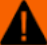

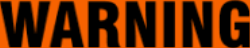

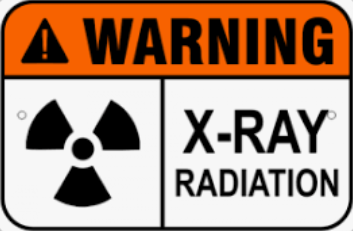

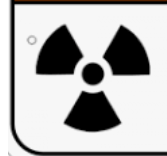

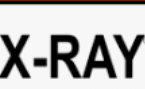

A

WARNING

ren

| oo

X-RAY

RADIATION

(474, 309)


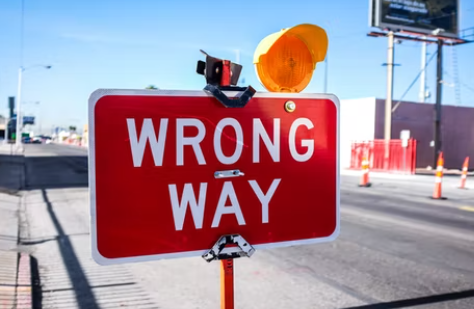


(433, 328)


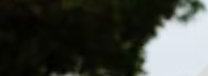

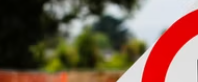

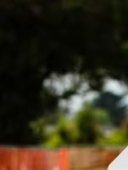

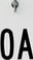

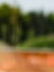

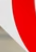

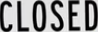

> ,

ce

Ps

A

_

—.


CLOSED

(444, 288)


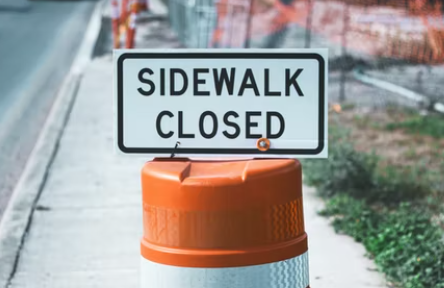

}



In [68]:
title=['warning1','warning2','warning3','warning4','warning5','warning6','warning7','warning8'
       ,'warning9','warning10','warning11','warning12','warning13','warning14','warning15','warning16','warning17','warning18','warning19','warning20']
for index in range(0,4):
    Tesseract_OCR(title[index],image_dir[index])

### Google Cloud Vision API

bound에 따라 표시해주기

In [32]:
def detect_text(path):
    """Detects text in the file."""
    from google.cloud import vision
    import io
    client = vision.ImageAnnotatorClient()

    with io.open(path, 'rb') as image_file:
        content = image_file.read()
        
    image = vision.Image(content=content)

    response = client.text_detection(image=image)
    texts = response.text_annotations
    total_bound = []
    print('Texts:')
    
    for text in texts:
        count = 0
        rect = []
        print('\n"{}"'.format(text.description))
        for vertex in text.bounding_poly.vertices:
            rect.append(vertex.x)
            rect.append(vertex.y)
            
        total_bound.append(rect)
#         vertices = (['({},{})'.format(vertex.x, vertex.y) for vertex in text.bounding_poly.vertices])
#         total_bound.append(vertices)
#         print('bounds: {}'.format(','.join(vertices)))

    if response.error.message:
        raise Exception(
            '{}\nFor more info on error messages, check: '
            'https://cloud.google.com/apis/design/errors'.format(
                response.error.message))
    return total_bound

In [33]:
# 로컬 환경에서는 다운받은 인증키 경로가 정확하게 지정되어 있어야 합니다. 
# 클라우드 환경에서는 무시해도 좋습니다
!ls -l $GOOGLE_APPLICATION_CREDENTIALS

import os
os.environ["GOOGLE_APPLICATION_CREDENTIALS"] =  os.getenv('HOME')+'/aiffel/ocr_python/my_google_api_key.json'

# 입력 이미지 경로를 지정해 주세요.
# (예시) path = os.getenv('HOME')+'/aiffel/ocr_python/test_image.png'
path =  os.getenv('HOME')+'/aiffel/ocr_python/data/warning1.png'   

# 위에서 정의한 OCR API 이용 함수를 호출해 봅시다.
bound = detect_text(path)
print(bound)

-rw-r--r-- 1 root root 2335 Feb 24 08:49 /aiffel/aiffel/ocr_python/my_google_api_key.json
Texts:

"A WARNING
X-RAY
RADIATION
"

"A"

"WARNING"

"X-RAY"

"RADIATION"
[[61, 18, 347, 18, 347, 205, 61, 205], [61, 18, 109, 18, 109, 81, 61, 81], [123, 18, 343, 18, 343, 81, 123, 81], [187, 113, 338, 113, 338, 169, 187, 169], [186, 177, 347, 177, 347, 205, 186, 205]]


In [34]:
bound[0]

[61, 18, 347, 18, 347, 205, 61, 205]

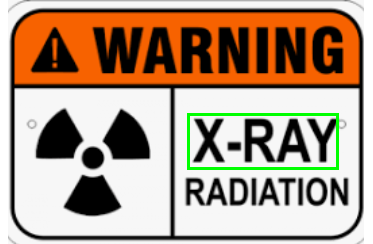

In [37]:
from PIL import Image, ImageDraw
img = Image.open(path).convert('RGB')
draw = ImageDraw.Draw(img)

draw.rectangle((bound[3][0],bound[3][1],bound[3][4],bound[3][5]), outline=(0,255,0), width = 3)


img.show()

In [44]:
def drae_ocr(path):
    bound = detect_text(path)
    img = Image.open(path).convert('RGB')
    draw = ImageDraw.Draw(img)

    for i in range(1,len(bound)):
        draw.rectangle((bound[i][0],bound[i][1],bound[i][4],bound[i][5]), outline=(0,255,0), width = 3)
    img.show()

image_0
Texts:

"A WARNING
X-RAY
RADIATION
"

"A"

"WARNING"

"X-RAY"

"RADIATION"


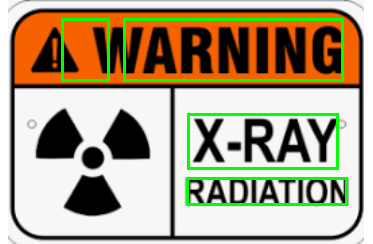

image_1
Texts:

"WRONG
WAY
"

"WRONG"

"WAY"


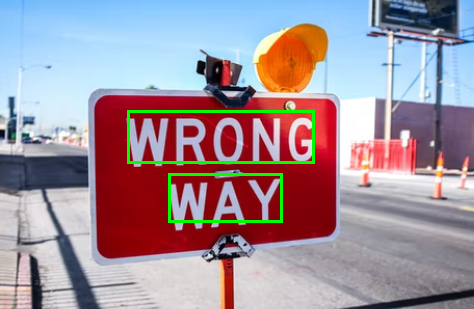

image_2
Texts:

"ROAD
CLOSED
"

"ROAD"

"CLOSED"


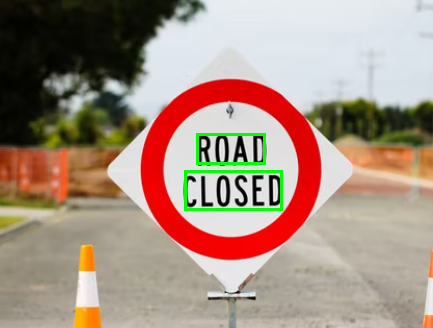

image_3
Texts:

"SIDEWALK
CLOSED
"

"SIDEWALK"

"CLOSED"


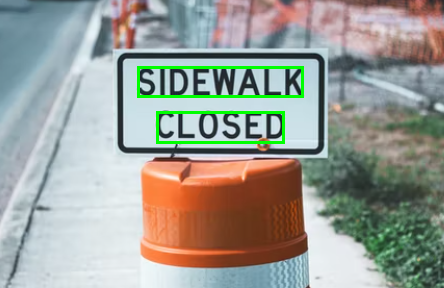

image_4
Texts:

"NO
PASSING
ZONE
"

"NO"

"PASSING"

"ZONE"


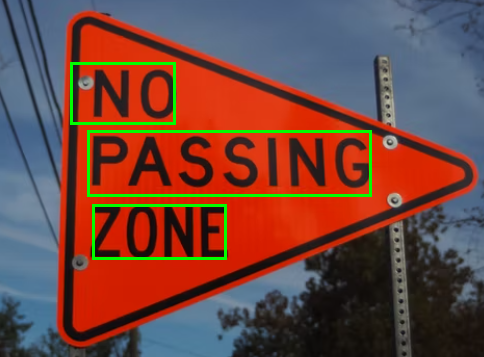

image_5
Texts:

"NO
DRONES
"

"NO"

"DRONES"


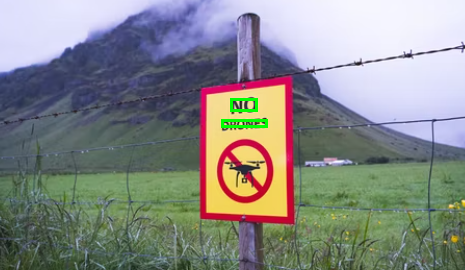

image_6
Texts:

"WATCH
CHILDREN
"

"WATCH"

"CHILDREN"


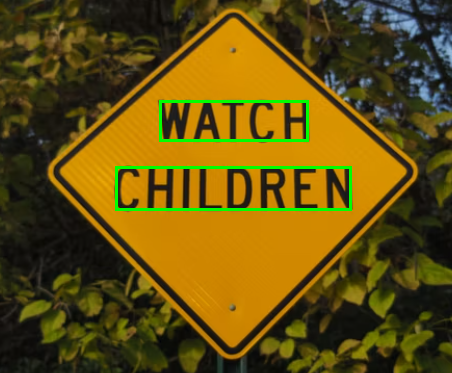

image_7
Texts:

"NEW
ROAD
LAYOUT
АНЕAD
EXCHANCE
"

"NEW"

"ROAD"

"LAYOUT"

"АНЕAD"

"EXCHANCE"


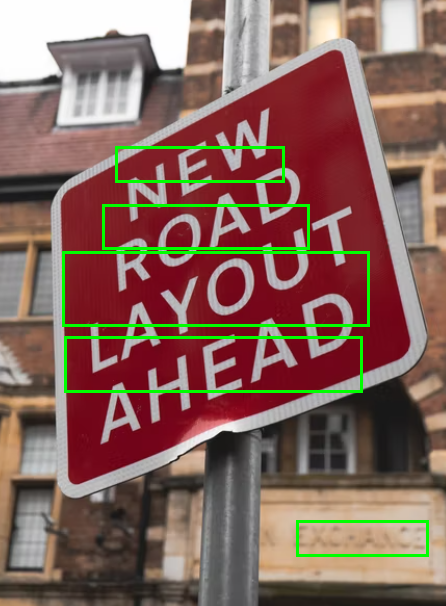

image_8
Texts:

"IMAGINE
ART
HERE
"

"IMAGINE"

"ART"

"HERE"


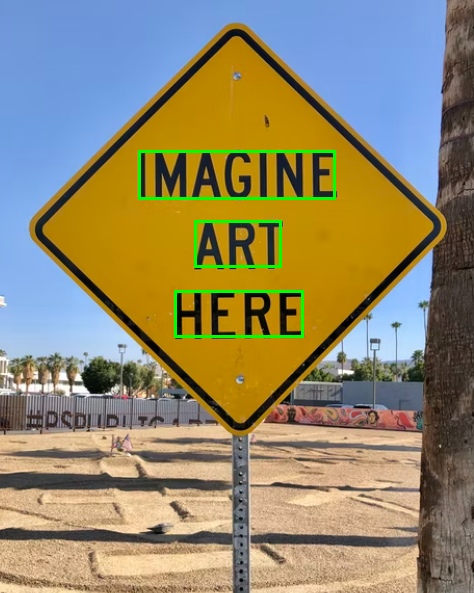

image_9
Texts:

"DO NOT
ENTER
WRONG
WAY
"

"DO"

"NOT"

"ENTER"

"WRONG"

"WAY"


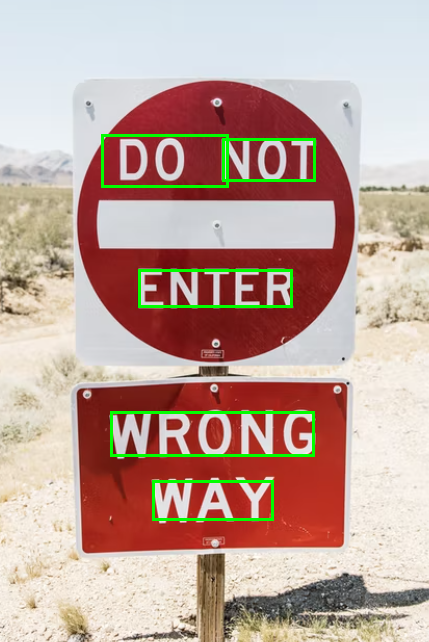

image_10
Texts:

"Ruhrverband
Hunde bitte an
der Leine führen
Kein Winterdienst
Benutzung
auf eigene Gefahr!
"

"Ruhrverband"

"Hunde"

"bitte"

"an"

"der"

"Leine"

"führen"

"Kein"

"Winterdienst"

"Benutzung"

"auf"

"eigene"

"Gefahr!"


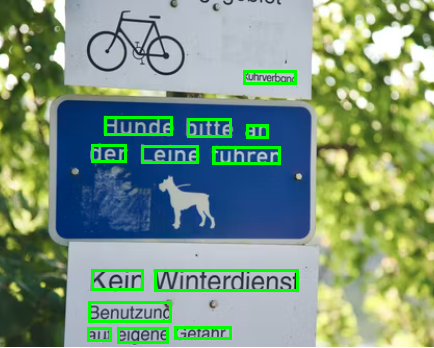

image_11
Texts:

"Anlieger
frei
Waldweg
Benutzung
auf eigene Gefahrt
Ruvebond
"

"Anlieger"

"frei"

"Waldweg"

"Benutzung"

"auf"

"eigene"

"Gefahrt"

"Ruvebond"


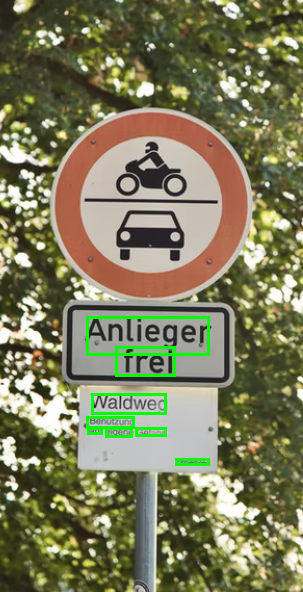

image_12
Texts:

"CAUTION
MAINTAIN
SOCIAL
DISTANCING
AT LEAST
6ft.
DISTANCE FROM OTHERS
"

"CAUTION"

"MAINTAIN"

"SOCIAL"

"DISTANCING"

"AT"

"LEAST"

"6ft."

"DISTANCE"

"FROM"

"OTHERS"


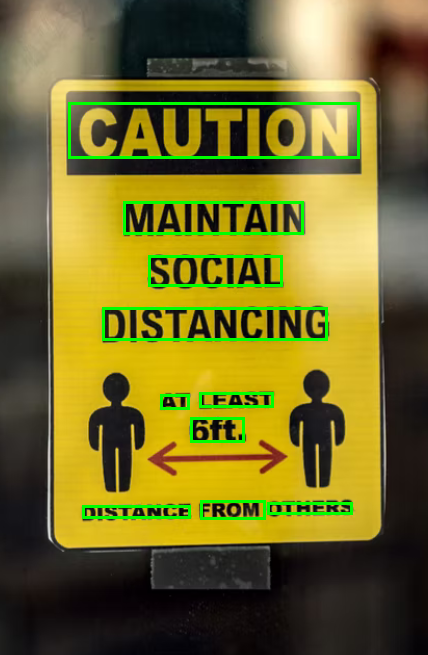

image_13
Texts:

"Hochspannung
Lebensgefahr
"

"Hochspannung"

"Lebensgefahr"


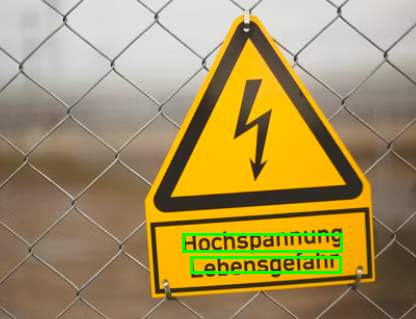

image_14
Texts:

"Greater Chennai Corporation
"CORONA HOTSPOT"
Restricted Area
Entry or Exit Not Allowed
"

"Greater"

"Chennai"

"Corporation"

""CORONA"

"HOTSPOT""

"Restricted"

"Area"

"Entry"

"or"

"Exit"

"Not"

"Allowed"


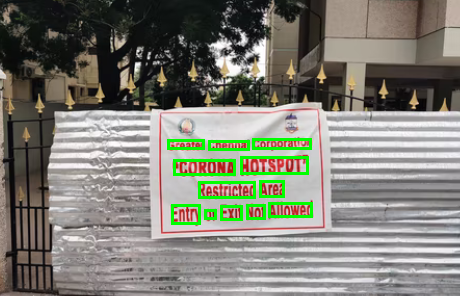

image_15
Texts:

"DONT OO
This is your
decision point.
Back country risks include deach.
"

"DONT"

"OO"

"This"

"is"

"your"

"decision"

"point."

"Back"

"country"

"risks"

"include"

"deach."


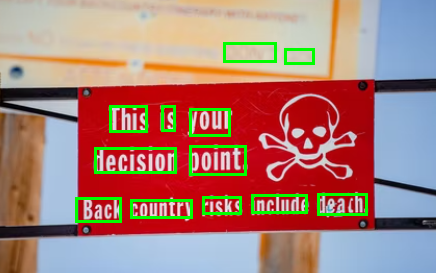

image_16
Texts:

"PLEASE
DONT TRY TO
SLEEP HERE
BE ADVISED
Y ORDER OF INTERIOR KINISTR
"

"PLEASE"

"DONT"

"TRY"

"TO"

"SLEEP"

"HERE"

"BE"

"ADVISED"

"Y"

"ORDER"

"OF"

"INTERIOR"

"KINISTR"


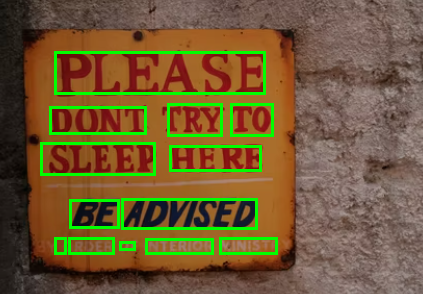

image_17
Texts:

"You Must
Wear A Mask
To Enter
Thank You!
"

"You"

"Must"

"Wear"

"A"

"Mask"

"To"

"Enter"

"Thank"

"You!"


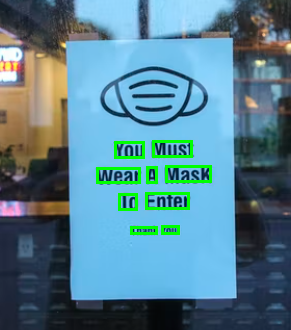

image_18
Texts:

"Pe
Please only
come inside if
it's absolutely
necessary
We need teepur members and colleagues as
safepe
Pene
weme
om tn
wymtionand
Natioide
"

"Pe"

"Please"

"only"

"come"

"inside"

"if"

"it's"

"absolutely"

"necessary"

"We"

"need"

"teepur"

"members"

"and"

"colleagues"

"as"

"safepe"

"Pene"

"weme"

"om"

"tn"

"wymtionand"

"Natioide"


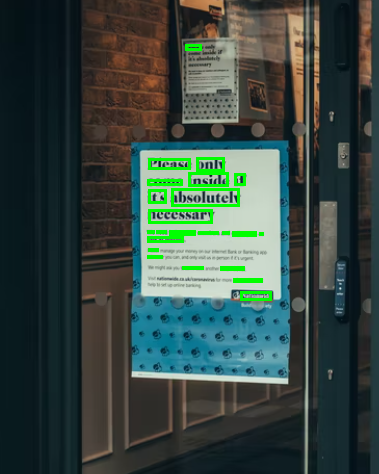

image_19
Texts:

"high visibility
clothing
must be worn
"

"high"

"visibility"

"clothing"

"must"

"be"

"worn"


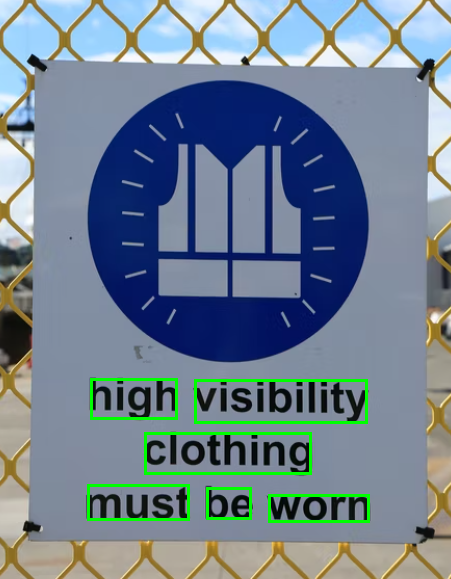

In [49]:
count = 0
for image in image_dir:
    print('image_{}'.format(count))
    drae_ocr(image)
    count=count+1

### 최종 결론 및 회고

Keras-OCR , Tesseract,Google Cloud Vision API를 활용하여 OCR 결과를 확인한 결과
Keras-OCR의 경우 이미지에서 작은 글자라도 정확히 인식하여 표시한 반면에 큰 아이콘이 있는 경우 글자로 인식하지 않고 다음 단계로 넘어가지면 해당 아이콘이 떨어져 있거나 빈 공간이 있는 경우에는 글자로 인식되는 단점이 있다.
<br/>
Tesseract의 경우 입력으로 들어오는 이미지를 crop에 의해 잘린 이미지에 대해 글자를 인식하기 때문에 OCR 결과가 제대로 나타나지 않는다는 것을 이미지 3개만 해도 결과로 볼 수 있다.
<br/>
Google Cloud Vision API의 경우 OCR 결과 큰 글자, 작은글자, 희미한 글자도 인식이 잘 되는 것을 확인할 수 있다. 또한, 이미지에서 아이콘으로 표시되거나 글자가 아닌 요소는 글자로 해석하지 않는다는 것을 확인 할 수 있다.


위에 제시한 평가기준으로 하면 Google Cloud Vision API가 가장 적절하다고 판단된다.
<br/>
다른 OCR API들을 활용하여 실생활에 사용할 경우 이미지에서 글자를 인식하지 못하거나 아이콘을 글자로 인식하는 등의 문제점으로 인해 불편함이 발생할 수 있기 때문이다.